# Ciencia de datos
---
# Tema 2 - Analítica descriptiva: comienza a extraer valor de los datos

#### ¿Qué vamos a ver en este NoteBook?
En este NoteBook trabajaremos la fase de "*comprensión de datos*" en la que dada una base de datos de partida buscamos entender cómo son los datos de los que disponemos y extraer información relevante que nos ayudará posteriormente en el proceso de toma de decisiones.
#### ¿Qué caso de uso vamos a trabajar? (Caso 1)
El de un departamento de marketing de un centro comercial el cuál, a través de las tarjetas de fidelización, dispone de algunos datos básicos sobre sus clientes como son: la identificación del cliente, la edad, el género, los ingresos anuales y una puntuación de gasto. La puntuación de gasto es algo que se asigna al cliente en función del comportamiento del cliente y los datos de compra.

El director de marketing quiere analizar los datos de los clientes para extraer nuevas perspectivas o *insights* que le premitan planificar una estrategia de marketing exitosa.

#### ¿Qué nos aporta el análisis?
Un análisis descriptivo nos permite conocer mejor nuestros datos. En este caso, entender cómo es nuestra base de clientes para poder diseñar la mejor estrategia de marketing.



## Base de datos (Caso 1)

La base de datos que vamos a utizar corresponde a la información se dispone de los clientes del centro comercial. Incluye los siguientes campos:

- **idcliente**: índice (valor numérico) de identificación del número de fila que se corresponde con el número de cliente.
- **genero**: variable categórica que se corresponde con el género del cliente (Male/Female).
- **edad**: variable numérica que se corresponde con la edad en años del cliente.
- **ingresosanuales**: variable numérica que se corresponde con los ingresos anuales del cliente (en miles de dólares).
- **gasto**: variable numérica que representa una puntuación que se corresponde con el dinero gastado en el centro comercial (va del 1 a 100).
- **antiguedad**: variable numérica que se corresponde con la antigüedad del cliente en meses (medida temporal de la fidelidad del cliente).

## Índice <a name="indice"></a>
- [Librerías y lectura de ficheros](#libreriasylectura)
- [Caracterización de la base de datos](#caracterizacionbd)
    - [Descripción de los datos](#descripcion)
    - [Descripción estadística](#descripcionestadistica)
    - [Tablas pivote](#pivottables)
- [Visualización de los datos](#visualizaciondatos)
    - [Diagramas de caja o *boxplot*](#boxplot)
    - [Diagrama de frecuencias o histograma](#histograma)
    - [Diagrama de dispersión o scatterplot](#diadispersion)
    - [Correlación entre variables y mapa de temperaturas](#correlacion)
- [Conclusiones](#conclusiones)

# Librerías y lectura de ficheros<a name="libreriasylectura"></a>
[Volver al índice](#indice)

En esta sección vamos a importar las librerías que utilizaremos en este NoteBook, así como la carga y conexión a los datos con los que trabajaremos.



---


                                              Librerías



---



Importamos la librería [Pandas](https://pandas.pydata.org/) para trabajar con tablas de datos *(dataframes)*:

In [1]:
import pandas as pd #librería Pandas para las tablas de datos en formato dataframe

Importamos las librerías de visualización. En este caso [Seaborn](https://seaborn.pydata.org/) es la que vamos a usar:

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns   #Seaborn es una extensión de Matplotlib

## Carga y lectura de datos <a name="lecturadatos"></a>
[Volver al índice](#indice)

---

Primero cargaremos la base de datos a Google Colaboratory y a continuación la leeremos como tabla de datos en Pandas, es decir, como un *dataframe*.



---


                                              Carga de datos

---



Aparecerá un menú con un botón que dice *Elegir archivos* que permitirá seleccionar el fichero de datos a cargar. En este NoteBook tenemos que cargar el fichero *Caso1.csv* que contiene la información de los clientes del centro comercial.

In [2]:
from google.colab import files
files.upload()

Saving Caso1.csv to Caso1.csv


{'Caso1.csv': b'idcliente,genero,edad,ingresosanuales,gasto,antiguedad\r\n1,Male,19,15,39,13\r\n2,Male,21,15,81,30\r\n3,Female,20,16,6,4\r\n4,Female,23,16,77,34\r\n5,Female,31,17,40,16\r\n6,Female,22,17,76,34\r\n7,Female,35,18,6,11\r\n8,Female,23,18,94,33\r\n9,Male,64,19,3,7\r\n10,Female,30,19,72,24\r\n11,Male,67,19,14,16\r\n12,Female,35,19,99,33\r\n13,Female,58,20,15,9\r\n14,Female,24,20,77,38\r\n15,Male,37,20,13,8\r\n16,Male,22,20,79,25\r\n17,Female,35,21,35,18\r\n18,Male,20,21,66,27\r\n19,Male,52,23,29,22\r\n20,Female,35,23,98,41\r\n21,Male,35,24,35,25\r\n22,Male,25,24,73,33\r\n23,Female,46,25,5,5\r\n24,Male,31,25,73,35\r\n25,Female,54,28,14,16\r\n26,Male,29,28,82,32\r\n27,Female,45,28,32,24\r\n28,Male,35,28,61,32\r\n29,Female,40,29,31,18\r\n30,Female,23,29,87,33\r\n31,Male,60,30,4,11\r\n32,Female,21,30,73,30\r\n33,Male,53,33,4,7\r\n34,Male,18,33,92,41\r\n35,Female,49,33,14,15\r\n36,Female,21,33,81,42\r\n37,Female,42,34,17,9\r\n38,Female,30,34,73,26\r\n39,Female,36,37,26,9\r\n40,Fem



---


                                              Lectura de los ficheros de datos



---



Leemos el fichero de datos del centro comercial a la vez que lo convertimos en tabla de datos (dataframe, df).

Como hemos cargado previamente el fichero *Caso1.csv* en Google Colab, lo podemos leer directamente con la función *read_csv()* de la librería Pandas.

In [3]:
#para que funcione esta instrucción es necesario cargar antes los datos
df = pd.read_csv('Caso1.csv')



---


                                              Definición de funciones


---



Aquí definimos unas funciones para ayudar en la graficación. Entre otras tenemos:

* **count_plot()** ;

Esta función permite graficar la distribución de frecuencias de una variable categórica.

Para poder utilizar esta función más adelante en este NoteBook deberemos ejecutar sin falta la celda de código que aparece a continuación.

In [7]:
def format_spines(ax, right_border=True):
   # definición de colores y contornos
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_color('#FFFFFF')
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')

def count_plot(feature, df, colors='Blues_d', hue=False):
    # definición de variables, cálculo de frecuencias y porcentajes
    ncount = len(df)
    fig, ax = plt.subplots()
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors)

    # crea doble eje
    ax2=ax.twinx()

    # intercambia ejes
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # cambia etiquetas de los ejes
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frecuencia [%]')

    # poniendo bordes
    format_spines(ax)
    format_spines(ax2)

    # poniendo porcentajes
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
                ha='center', va='bottom') # alineamiento del texto
   # if not hue:
   #     ax.set_title(df[feature].describe().name + ' Análisis', size=13, pad=15)
   # else:
   #     ax.set_title(df[feature].describe().name + ' Análisis por ' + hue, size=13, pad=15)
plt.show()

# Caracterización de la base de datos <a name="caracterizacionbd"></a>
[Volver al índice](#indice)

Primero, podemos hallar las dimensiones (número de filas, número de columnas) de la tabla de datos (dataframe) mediante la función *shape()*:

In [ ]:
df.shape

(200, 6)

O visualizar el encabezado del dataframe utilizando la función *head()*: nombre de las variables (columnas) y primeras 5 filas,

In [ ]:
# veamos las primeras 5 filas de la base de datos
df.tail() #muestra los 5 últimos datos
#df.head() #muestra los 5 primeros

idcliente  genero  edad  ingresosanuales  gasto  antiguedad
195        196  Female    35              120     79          35
196        197  Female    45              126     28          18
197        198    Male    32              126     74          34
198        199    Male    32              137     18          16
199        200    Male    30              137     83          41

### Descripción de los datos <a name="descripcion"></a>
[Volver al índice](#indice)

Para cada variable (columna del dataframe) nos interesa conocer con la siguiente función *df.info()* el número no nulo de valores en **Non-Null Count** y los tipos de variables tal y como se muestra en la columna **Dtype**. Hay 2 tipos de variables:
1. La variable categórica género como *object*.
2. La variables numéricas que son números enteros *int* y también números decimales *float*.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   idcliente        200 non-null    int64 
 1   genero           200 non-null    object
 2   edad             200 non-null    int64 
 3   ingresosanuales  200 non-null    int64 
 4   gasto            200 non-null    int64 
 5   antiguedad       200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


###  Descripción estadística <a name="descripcionestadistica"></a>
[Volver al índice](#indice)

Descripción estadística rápida de las variables: número de datos (**count**); valor medio (**mean**); desviación estándar (**std**); valor mínimo (**min**); percentiles **25%, 50% y 75%** y el valor máximo (**max**).

A los percentiles **25%, 50% y 75%** les corresponden las posiciones conocidas como cuartiles que respectivamente son **Q1, Q2 y Q3**. Siendo el cuartil Q2 igual al valor de la mediana de la distribución. **El rango intercuartílico**, IQR, se define como la diferencia: Q3 - Q1.

In [ ]:
df.describe()
df['genero'].describe()

count        200
unique         2
top       Female
freq         112
Name: genero, dtype: object

In [ ]:
df['ingresosanuales'].mean()

60.56

In [ ]:
df['genero'].value_counts()

genero
Female    112
Male       88
Name: count, dtype: int64

In [ ]:
# Agregar una nueva columna a nuestra columna de datos
df.loc[df['edad']<=45,'Grupo_edad',]='Adulto'
df.loc[df['edad']>=46,'Grupo_edad',]='Adulto Senior'
df.loc[df['edad']<=21,'Grupo_edad',]='Joven'

In [ ]:
df['Grupo_edad'].value_counts()

Grupo_edad
Adulto           112
Adulto Senior     66
Joven             22
Name: count, dtype: int64

In [ ]:
df['edad'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: edad, dtype: float64

In [ ]:
df.head() #los 5 primeros

idcliente  genero  edad  ingresosanuales  gasto  antiguedad Grupo_edad
0          1    Male    19               15     39          13      Joven
1          2    Male    21               15     81          30      Joven
2          3  Female    20               16      6           4      Joven
3          4  Female    23               16     77          34     Adulto
4          5  Female    31               17     40          16     Adulto

In [ ]:
df['Grupo_edad'].value_counts()

Grupo_edad
Adulto           112
Adulto Senior     66
Joven             22
Name: count, dtype: int64

In [ ]:
df.groupby('genero')['edad'].agg(['mean','std'])

mean        std
genero                      
Female  38.098214  12.644095
Male    39.806818  15.514812

In [ ]:
df.groupby('Grupo_edad')['genero'].agg(['value_counts'])

value_counts
Grupo_edad    genero              
Adulto        Female            69
              Male              43
Adulto Senior Female            34
              Male              32
Joven         Male              13
              Female             9

Utilizamos la función *sort_values()* en el caso que nos interese ordenar las filas del dataframe con respecto al orden creciente de una de las variables, por ejemplo, en este caso con respecto a la columna "edad" de los clientes.

Para comprobar (siempre es recomendable hacer comprobación de todas las manipulaciones que realicemos de los dataframes) que se ha realizado este orden con respecto a la edad utilizamos la función *head()* que nos permite visualizar exactamente el número de filas que nos interesa. Si no indicamos ningún valor en esta función se muestran las primeras cinco filas que son suficientes para comprobar que el orden es creciente y que no se han producido errores.

In [ ]:
# ordenamos los datos por edad y mostramos 5 primeras filas que es el número por defecto si no se indica ningún valor en head()
df.sort_values(by="edad").head()

idcliente  genero  edad  ingresosanuales  gasto  antiguedad Grupo_edad
114        115  Female    18               65     48          19      Joven
91          92    Male    18               59     41          26      Joven
65          66    Male    18               48     59          30      Joven
33          34    Male    18               33     92          41      Joven
0            1    Male    19               15     39          13      Joven

### Tablas pivote <a name="pivottables"></a>
[Volver al índice](#indice)

Este método funciona de forma muy parecida al "pivot table" (tabla dinámica) de Excel. Las tablas pivote nos permiten extraer de la tabla de datos original (*dataframe*) una o varias variables de interés que serán las columnas de la tabla pivote en función de una segunda variable de tipo categórica (u otro tipo) con capacidad para segregar los datos.

El primer argumento `values` especifica sobre que valor queremos pivotar, el segundo `index`, que  índice vamos a utilizar para mostrar la información y `aggfunc` especifica la función de agrupación que queramos hacer. Las más comunes son `mean`(que calcula la media) y `count` (que cuenta el número de registros).

Veamos algunos ejemplos de cómo podemos usar las tablas dinámicas para obtener información.



1. Distribución de clientes por género.

In [ ]:
pd.pivot_table(df, values=['gasto'], index=['genero'], aggfunc='count')

gasto
genero       
Female    112
Male       88

2. Nivel de gasto medio de los clientes por género.

In [ ]:
pd.pivot_table(df, values=['gasto'], index=['genero'], aggfunc='mean')

gasto
genero           
Female  51.526786
Male    48.511364

3. Nivel de gasto, ingresos anuales y antigüedad media de los clientes por género.

In [ ]:
pd.pivot_table(df, values=['ingresosanuales','gasto','antiguedad','edad'], index=['genero'], aggfunc='mean')

antiguedad       edad      gasto  ingresosanuales
genero                                                   
Female   22.785714  38.098214  51.526786        59.250000
Male     22.534091  39.806818  48.511364        62.227273

Las tablas pivote son una herramienta muy práctica en la exploración y descripción de datos debido a su versatilidad ya que permite de forma sencilla estudiar los datos de forma agrupada.

En este caso podemos inferir las siguientes **conclusiones**:

- Tenemos ligeramente más clientes mujeres que hombres 112 (?%) vs 88 (?%).
- El gasto medio por género es practicamente el mismo.
- Aunque la antigüedad media es independiente del género, sin embargo, los ingresos de los hombres son algo superiores a los de las mujeres.

# Visualización de los datos <a name="visualizaciondatos"></a>
[Volver al índice](#indice)

A continuación, con la librería **Seaborn** podemos graficar de forma sencilla los datos para realizar un primer análisis descriptivo.

### Diagramas de caja o *boxplot* <a name="boxplot"></a>
[Volver al índice](#indice)

El diagrama de caja o boxplot es una representación gráfica que nos permite localizar rápidamente las medidas más representativas de los datos observados (o medidos).

El 50% de los valores medidos u observados se encuentran dentro de la caja (boxplot). La línea central representa la mediana que es el cuartil Q2 (percentil 50), por lo que el 25% de los valores de la caja se encuentra por debajo de la mediana y el 25% por encima.  

Las partes inferior y superior del boxplot (que delimitan la caja) representan los cuartiles Q1 (percentil 25) y Q3 (percentil 75) respectivamente.

Vamos a evaluar los diagramas de cajas para las variables (columnas): edad, nivel de gasto, ingresos anuales y antigüedad.


#### Diagrama de caja para la medida de la variable edad

Presentamos el boxplot correspondiente a las edades de los clientes. Lo obtenemos con la herramienta de visualización de Seaborn a través de la función *boxplot()*.

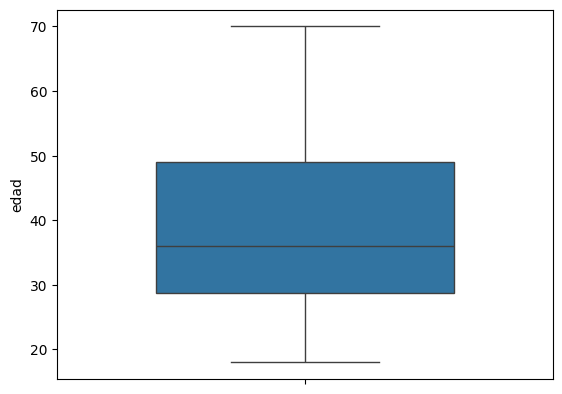

In [ ]:
# boxplot de las edades de los clientes
sns.boxplot(data=df, y='edad', width=0.6)
sns.set(font_scale=1.5) #seleccionamos un tamaño de letra legible
plt.show()

Podemos ver la tabla de valores que describe el propio diagrama de caja (boxplot) mediante la función *describe()*. Se puede observar que el el máximo y el mínimo coinciden con los extremos del boxplot y los percentiles con los extremos de la caja (25% y 75%) y la mediana (50%).

In [ ]:
# al añadir to_frame() se muestra como tabla
df['edad'].describe().to_frame()

edad
count  200.000000
mean    38.850000
std     13.969007
min     18.000000
25%     28.750000
50%     36.000000
75%     49.000000
max     70.000000

También podemos graficar todas nuestras variables de una sola vez para analizar los datos de forma eficiente.

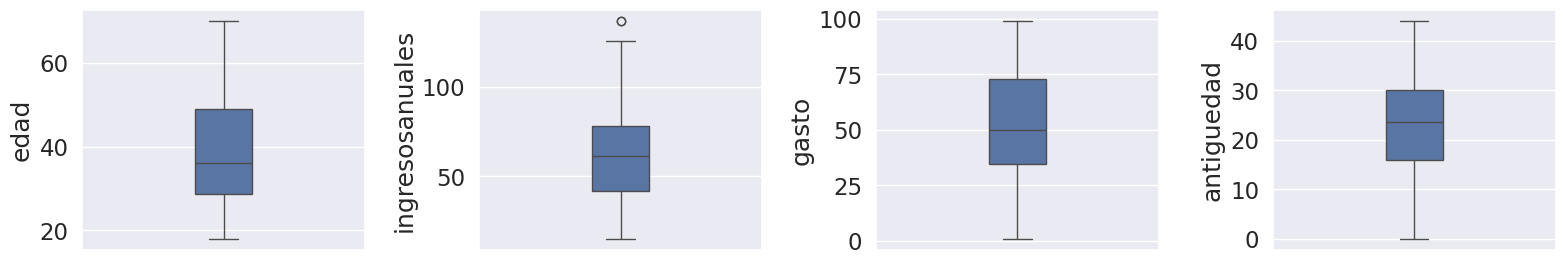

In [ ]:
# creamos 4 graficos (plots)
fig, axes = plt.subplots(1, 4, figsize=(16, 3))
sns.set(font_scale=1.5) #seleccionamos un tamaño de letra legible
# graficamos los diagramas de cajas y asignamos cada uno a su eje
sns.boxplot(data=df, y='edad', width=0.2, ax=axes[0])
sns.boxplot(data=df, y='ingresosanuales', width=0.2, ax=axes[1])
sns.boxplot(data=df, y='gasto', width=0.2, ax=axes[2])
sns.boxplot(data=df, y='antiguedad', width=0.2, ax=axes[3])
# separaoms los gráficos para que se vean mejor
plt.tight_layout()

En este caso podemos inferir las siguientes **conclusiones**:

- La mayor parte de nuestros clientes se situan en el rango de 30 - 50 años.
- Los ingresos anuales se situan en general en el rango 45 - 75 mil dólares anuales.
- La puntuación de gasto se sitúa entre 40 - 60 puntos.
- La mayor parte de los clientes tienen una antigüedad que se sitúa entre  los 15 y los 30 meses. Esta antigüedad se ha determinado a partir del tiempo transcurrido desde que el cliente solicitó una tarjeta cliente.

### Diagramas de frecuencias o histogramas <a name="histograma"></a>
[Volver al índice](#indice)

Un **histograma** es un gráfico de distribución de frecuencias. Es decir, un histograma nos permite leer en altura sobre la gráfica el número de veces que un valor determinado de la variable (columna del dataframe) aparece repetido. En un histograma cada bin representa un intervalo de observaciones (anchura del bin) y cuenta en el eje vertical el número de observaciones que se encuentran dentro de cada intervalo, es decir, mide su **frecuencia** (frecuencia absoluta).

En los histogramas también podemos asociar valores enteros a datos catégoricos (cualitativos) como se muestra en el siguiente ejemplo.


---



La frecuencia en % representa la frecuencia relativa mientras que la frecuencia absoluta responde a la etiqueta *count* (en español se conoce como **contaje**).

#### Diagrama de frecuencias para el género

<ipython-input-7-8175de22a029>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=df, palette=colors)


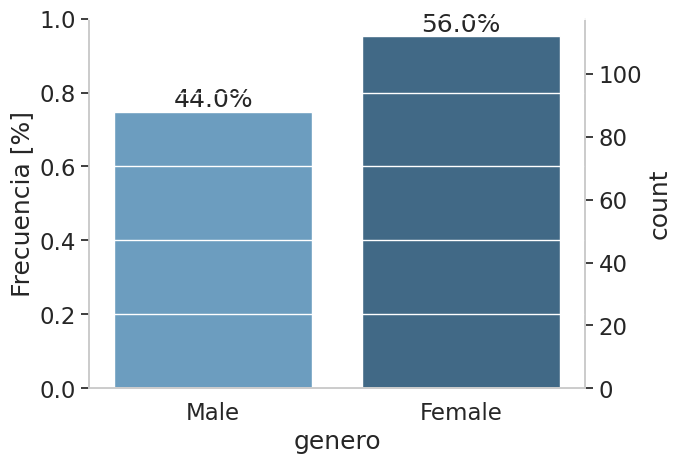

In [ ]:
# diagrama frecuencia género
sns.set(font_scale=1.5) #seleccionamos un tamaño de letra legible
count_plot( df=df, feature='genero')

#### Diagrama de frecuencias para la edad

Una de las variables que se utilizan habitualmente para estudiar a los clientes es la edad. Desde marketing se han definido tres grupos de edad:

- 18 - 22 años : Joven
- 23 - 50 años : Adulto
- +50 años : Senior

Para poder tratar esta variable realizaremos una agrupación con la función *cut()* a modo de **intervalos o bins**. Esta función nos permite generar rangos de edad acordes a las directrices de marketing para poder analizarlos posteriormente.

<ipython-input-7-8175de22a029>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=feature, data=df, palette=colors)


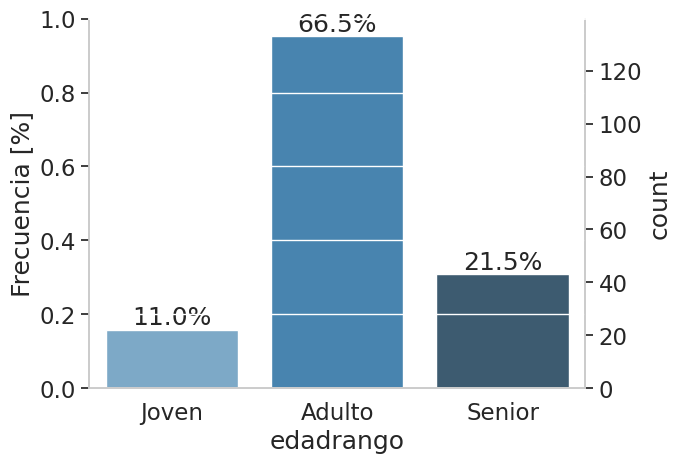

In [ ]:
# creamos una nueva columna con las categorías de edad
bins = [18, 22, 50, 70]
labels = ['Joven', 'Adulto', 'Senior']
df['edadrango'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)
sns.set(font_scale=1.5) #seleccionamos un tamaño de letra legible
# resultado
count_plot(df=df, feature='edadrango')

#### Diagrama de frecuencias para la edad y género

Se pueden añadir combinar variables para enriquecer el análisis de forma que aparezcan las frecuencias por edad y género.

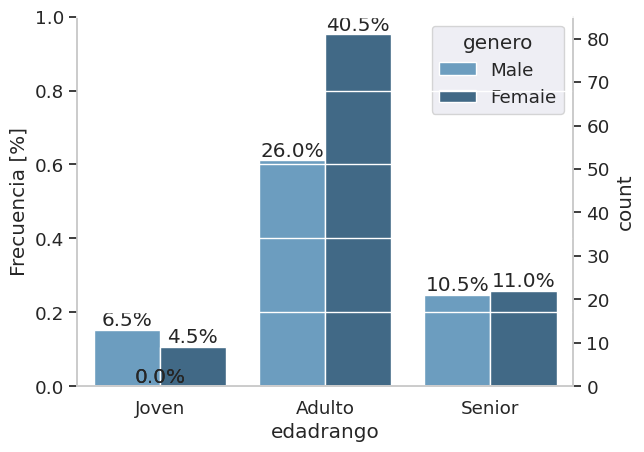

In [ ]:
#---código para la
sns.set(font_scale=1.2) #seleccionamos un tamaño de letra legible
# frecuencias para la edad por genero
count_plot(df=df, feature='edadrango', hue='genero')

En este caso podemos inferir las siguientes **conclusiones**:

- La mayor parte de los clientes se situan en el rango de edad 'Adulto' con una predominancia de mujeres que asciende al 40%.

#### Histograma de frecuencias por edad de los clientes

Distribución de las edades de los clientes (binarización utilizando Pandas que por defecto selecciona 10 bins o invervalos o barras). Cada barra del histograma representa en altura el porcentaje de clientes comprendidos en un rango de edad que es igual a la anchura de la barra.

La representación se hace a través de la función *histplot()* de la librería Seaborn. El primer argumento `data` especifica los datos sobre los que se generará el histograma, el segundo `stat`, indica que queremos que calcule el porcentaje, `bins` especifica en cuantos intervalos queremos dividir las edades y `kde` indica con la opción 'True' que queremos superponer una línea que represente una distribución aproximada de los datos.

Veamos algunos ejemplos de como podemos usar las tablas dinámicas para obtener información. En todos los casos se grafica en el eje horizontal (X) la variable y en el vertical (Y) el porcentaje.

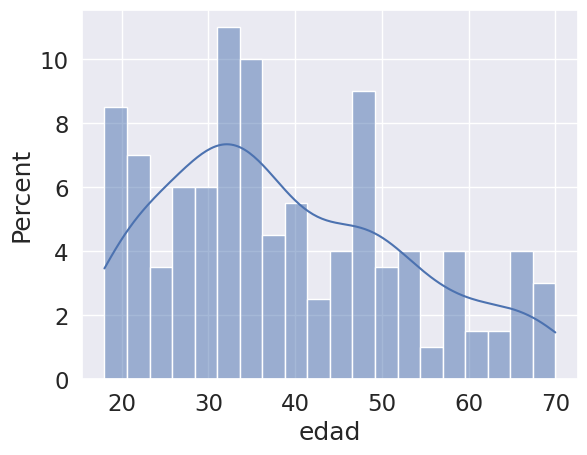

In [ ]:
# histograma de la variable edad
sns.set(font_scale=1.5) #seleccionamos un tamaño de letra legible
sns.histplot(data = df['edad'], stat='percent', bins=20, kde=True)
plt.show()

También podemos graficar todas nuestras variables de una sola vez para analizar los datos de forma eficiente.

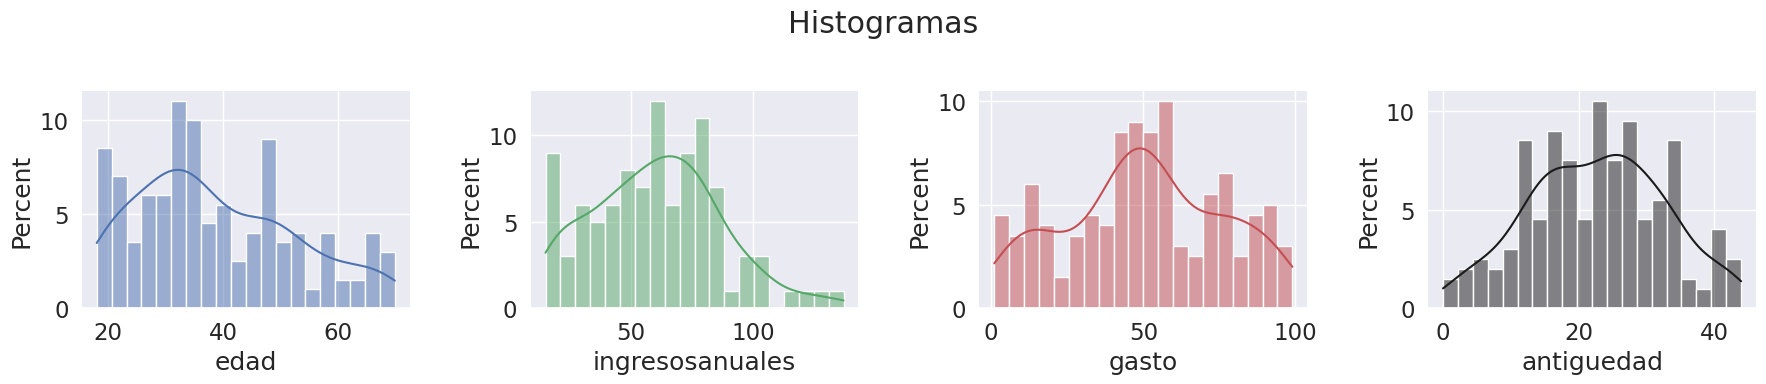

In [ ]:
# creamos 4 gráficos para mostrar
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
sns.set(font_scale=1.5) #seleccionamos un tamaño de letra legible
# graficamos las variables edad, ingresos, gasto y antiguedad
sns.histplot(df['edad'], stat='percent', bins=20, kde=True, ax=axs[0])
sns.histplot(df['ingresosanuales'], stat='percent', bins=20, kde=True, ax=axs[1], color='g')
sns.histplot(df['gasto'], stat='percent', bins=20, kde=True, ax=axs[2], color='r')
sns.histplot(df['antiguedad'], stat='percent', bins=20, kde=True, ax=axs[3], color='k')
# configuramos los gráficos para mejor visualización
sns.despine(left=True)
fig.suptitle('Histogramas')
plt.tight_layout()





#### Histograma de gasto por género

Se pueden dibujar histogramas más completos al presentar la diferenciación entre el gasto realizado por hombre y mujeres (frecuencias relativas o normalizadas en porcentajes):

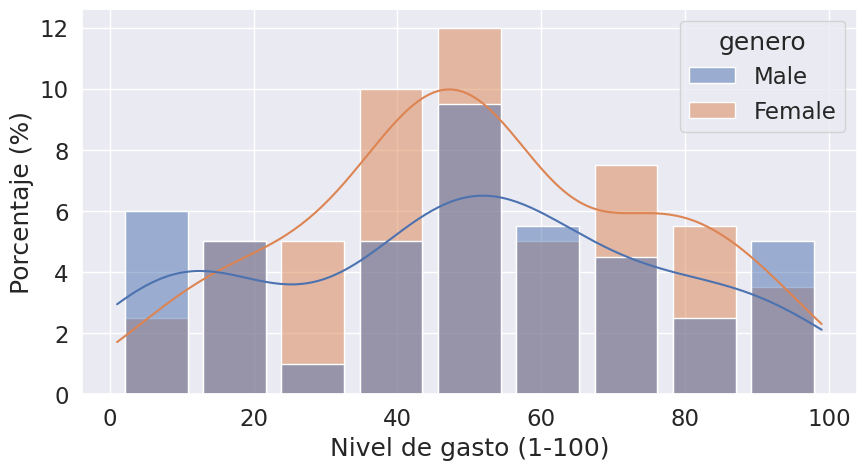

In [ ]:
# creamos la figura a mostrar
plt.figure('',figsize=(10,5))
sns.set(font_scale=1.5) #seleccionamos un tamaño de letra legible
# graficamos con Seaborn
sns.histplot(data=df, x="gasto", hue="genero",
               shrink=.8,stat="percent", legend=True, kde=True)

# configuramos los gráficos para mejor visualización
plt.xlabel('Nivel de gasto (1-100)',size = 18)
plt.ylabel('Porcentaje (%)',size = 18)
plt.show()

Otra opción es mostrar más en detalle la distribución del gasto para cada grupo de edad y por género. Para ello utilizamos la función *kdeplot()*.

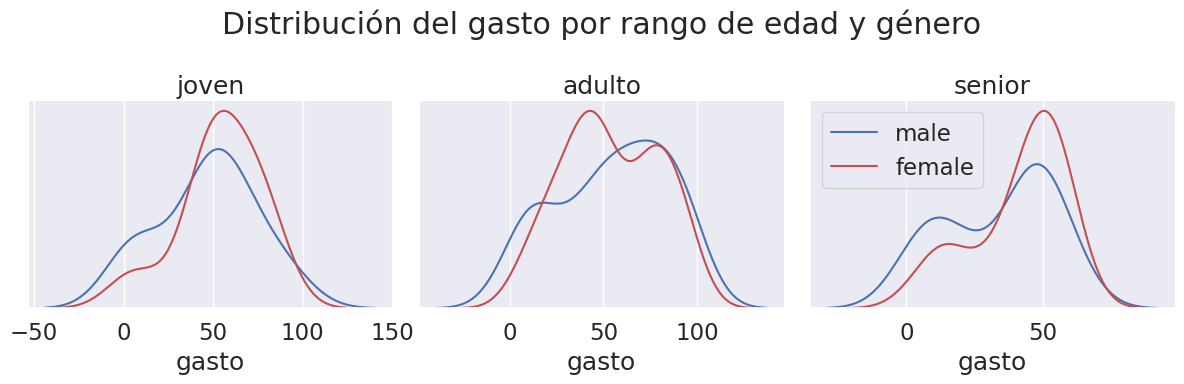

In [ ]:
# Configuración de los gráficos
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
sns.set(font_scale=1.5) #seleccionamos un tamaño de letra legible
sns.despine(left=True)
# Creamos los rangos de edad
joven = df.loc[df['edadrango'] == 'Joven']
adulto = df.loc[df['edadrango'] == 'Adulto']
senior = df.loc[df['edadrango'] == 'Senior']
titulos = ['joven', 'adulto', 'senior']
# Gráfico kdeplot Jóvenes:
sns.kdeplot(joven[joven['genero']=='Male']['gasto'], legend=True,
             ax=axs[0], label='male', color='b')
sns.kdeplot(joven[joven['genero']=='Female']['gasto'], legend=True,
             ax=axs[0], label='female', color='r')
axs[0].set_title(titulos[0])
# gráfico kdeplot Adultos:
sns.kdeplot(adulto[adulto['genero']=='Male']['gasto'],
            ax=axs[1], label='male', color='b')
sns.kdeplot(adulto[adulto['genero']=='Female']['gasto'],
            ax=axs[1], label='female', color='r')
axs[1].set_title(titulos[1])
# Gráfico kdeplot Senior:
sns.kdeplot(senior[senior['genero']=='Male']['gasto'],
            ax=axs[2], label='male', color='b')
sns.kdeplot(senior[senior['genero']=='Female']['gasto'],
            ax=axs[2], label='female', color='r')
axs[2].set_title(titulos[2])
plt.legend()
#--------- Configuración del gráfico
fig.suptitle('Distribución del gasto por rango de edad y género')
plt.setp(axs, yticks=[])
plt.setp(axs, ylabel=None)
plt.tight_layout()
plt.subplots_adjust(top=.75)

En este caso sobre los resultados de gasto [1-100] podemos inferir las siguientes **conclusiones**:

- La distribución de gasto en mujeres jóvenes es más elevado que en hombres jóvenes. Además este gasto se concentra en torno a las 50 unidades.
- La distribución de gasto en adultos es superior en mujeres pero para gastos inferiores a 50 unidades.
- El gasto en la categoría senior se concentra en los valores bajos y altos. Siendo los hombres los que realizan un mayor gasto para valores menores a 30 unidades mientras que las mujeres realizan un mayor gasto para valores superiores a 30.

En general podemos decir que:

Independientmente del género el valor medio de gasto se sitúa en torno a las 50 unidades, pero que las mujeres gastan más que los hombres en rangos de gasto mayores (superiores a las 50 unidades) mientras que los hombres gastan más en rangos de gasto menores a excepción del grupo de clientes adultos.

## Diagrama de dispersión o scatterplot <a name="diadispersion"></a>
[Volver al índice](#indice)

El diagrama de dispersión o *scatterplot* nos permite representar gráficamente los datos observados (que aparecen como puntos aquí sin unir) y descubrir dependencias. Esto se realiza a través de la función *scatterplot()*. A continuación se muestra el diagrama de frecuencias entre las variables gasto y antiguedad.

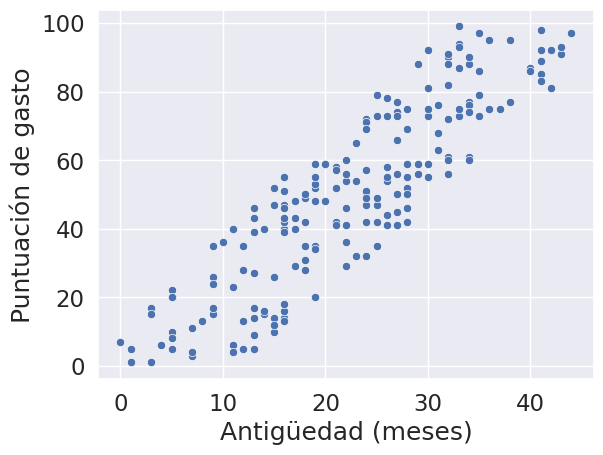

In [ ]:
# Graficamos con la función scatterplot
sns.set(font_scale=1.5) #seleccionamos un tamaño de letra legible
sns.scatterplot(data=df, x="antiguedad", y="gasto",color="b")
# Configuración del gráfico
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Puntuación de gasto')
plt.show()

A continuación vamos a volver a realizar este tipo de análisis gráfico pero añadiremos diferenciación por género

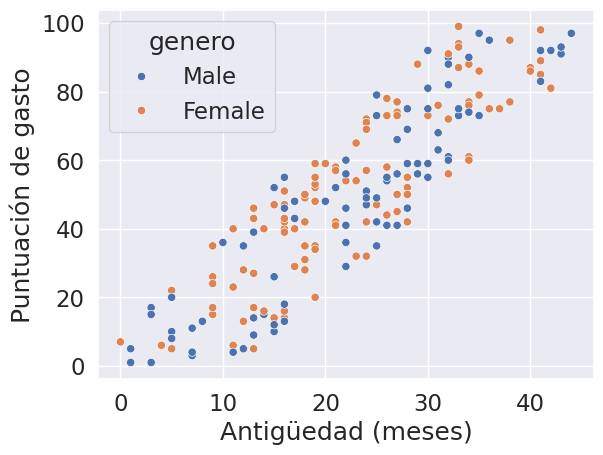

In [ ]:
# Graficamos con la función scatterplot
sns.set(font_scale=1.5) #seleccionamos un tamaño de letra legible
sns.scatterplot(data=df, x="antiguedad", y="gasto", hue="genero",
                )
# Configuración del gráfico
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Puntuación de gasto')
plt.show()

Comprobamos como el diagrama de dispersión o *scatterplot* nos permite interpretar la existencia de una asociación entre las variables antigüedad de los clientes y nivel de gasto.

Si queremos evaluar la dependencia dos a dos entre todas las variables podemos construir una **"matriz de visualización de los diagramas de dispersión"**  donde en la diagonal se representen las curvas de densidad de cada variable y en la zona triangular superior e inferior los respectivos diagramas de puntos por pares de variables. Además hemos añadido la diferenciación por género.


---
Para este análisis es imprescindible eliminar la indexación correspondiente al número de cliente ya que no se trata de una variable. Para ello utilizamos la función *drop()*.


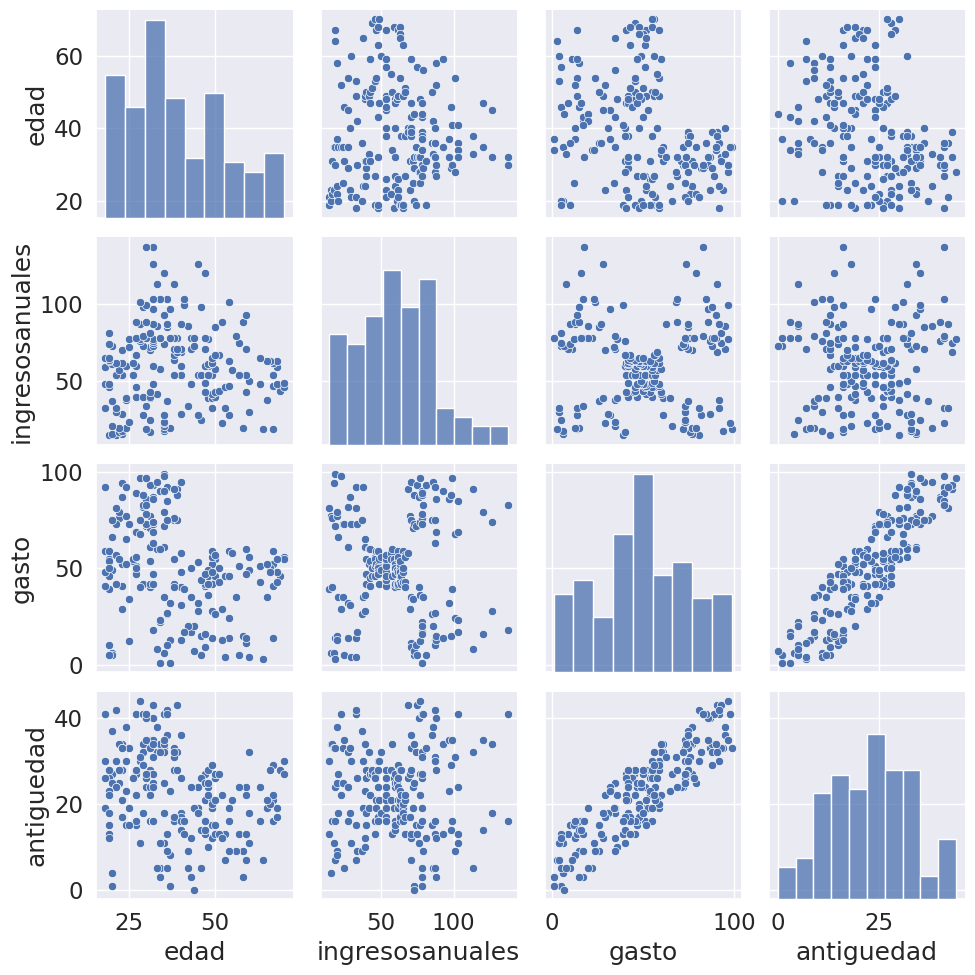

In [ ]:
#Matriz de diagramas de dispersión
sns.set(font_scale=1.5) #seleccionamos un tamaño de letra legible
sns.pairplot(df.drop(['idcliente'], axis=1)) #debemos eliminar (con drop) las columnas que no representan ninguna variable significativa del problem
plt.show()

## Correlación entre variables y mapa de temperaturas <a name="correlacion"></a>

[Volver al índice](#indice)

La correlación entre las variables de nuestro problema de empresa es una medida muy práctica para estudiar el grado de dependencia entre éstas. Esta medida de dependencia se realiza mediante el *coeficiente de correlación (de Pearson)*

El **coeficiente de correlación (de Pearson)** entre dos variable indica el grado de asociación lineal entre estas. Su valor se encuentra comprendido entre -1 y 1 y a menudo se designa la correlación mediante la letra griega $\rho$.

Podemos decir que si el coeficiente de correlación $\rho=0$ las variables no están correlacionadas, mientras que si $\rho \approx 1$ decimos que las variables están fuertemente correlacionadas (son colineales).

1) Podemos evaluar la correlación entre las variables (columnas) numéricas del dataframe de dos en dos. Sin embargo, es más práctico hacerlo directamente entre todas las columnas del dataframe que sean numéricas a excepción de la variable de indexación. Por tanto, extraeremos la indexación del cliente (*idcliente*) mediante la función *drop()*.  

2) Es habitual que la medida de la correlación (cruzada) entre todas las variables pueda visualizarse fácilmente mediante un mapa de temperaturas o *heatmap*.

3) Observamos que nuestras variables numéricas son tres y que, por lo tanto, la matriz de correlación tendrá dimensiones 3x3 (u orden 3).

In [ ]:
#Nos quedamos con todas las columnas del dataframe excepto la indexación del cliente.
#corr = df.drop(columns='idcliente').corr(method='pearson')
df1=df[['edad','ingresosanuales','gasto','antiguedad']]
df1

edad  ingresosanuales  gasto  antiguedad
0      19               15     39          13
1      21               15     81          30
2      20               16      6           4
3      23               16     77          34
4      31               17     40          16
..    ...              ...    ...         ...
195    35              120     79          35
196    45              126     28          18
197    32              126     74          34
198    32              137     18          16
199    30              137     83          41

[200 rows x 4 columns]

In [ ]:
corr = df1.corr(method='pearson')
corr.head()

edad  ingresosanuales     gasto  antiguedad
edad             1.000000        -0.012398 -0.327227   -0.291073
ingresosanuales -0.012398         1.000000  0.009903    0.007221
gasto           -0.327227         0.009903  1.000000    0.879875
antiguedad      -0.291073         0.007221  0.879875    1.000000

4) Hacemos una representación gráfica de la correlación mediante la visualización de la **matriz de correlación** (*cruzada*) en forma de **mapa de temperaturas** (*heatmap*). Se trata de una matriz 4x4 a la que se le asigna un grado de color en función del valor numérico de la correlación.

5) Podemos observar que junto al mapa de temperaturas aparece una escala graduada *de temperaturas* que nos indica el color correspondiente a los distintos valores numéricos de la correlación. Para esta paleta de colores los tonos oscuros corresponden a la máxima correlación (1) mientras que los tonos claros corresponde valores mínimos de correlación. Cuando no existe ninguna dependencia entre las variables la correlación es aproximadamente cero.



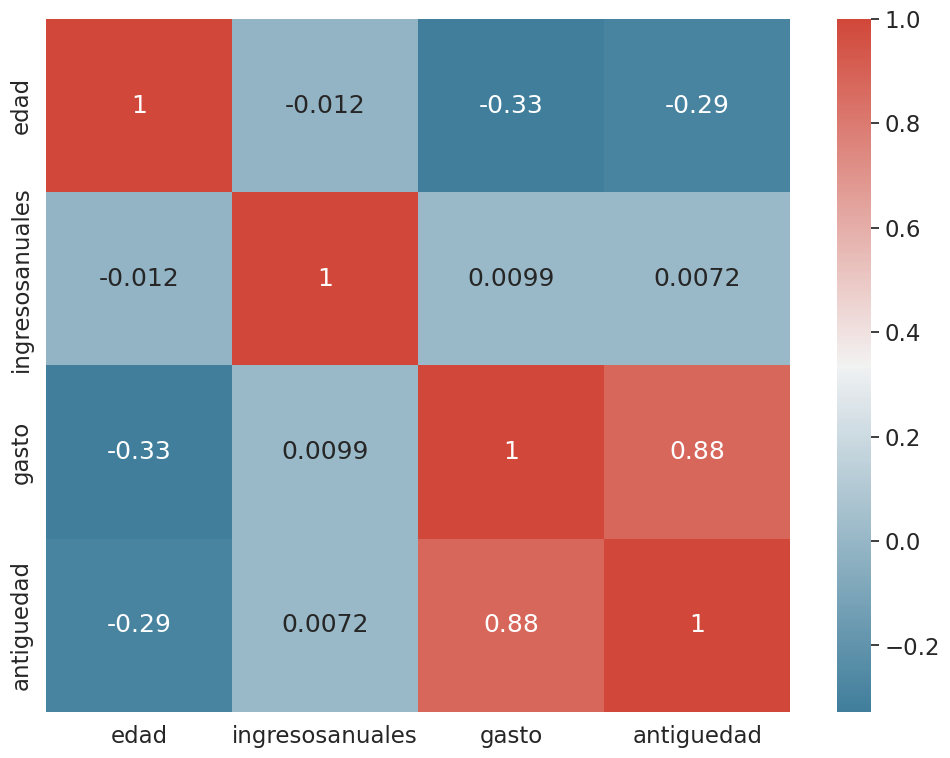

In [ ]:
plt.figure(figsize=(12,9)) #seleccionamos un tamaño de imagen mayor
sns.set(font_scale=1.5) #seleccionamos un tamaño de letra legible
# preparación del gráfico definiendo un mapa de colores
cmap = sns.diverging_palette(230, 15, as_cmap=True)
# graficamos la correlación
sns.heatmap(corr, annot=True,  cmap=cmap)
plt.show()

En este caso podemos inferir las siguientes **conclusiones**:

- Los elementos de la diagonal principal tienen correlación máxima y que ésta es igual a uno (tal y como cabe esperar a partir de la definición).
- La correlación entre la edad y los ingresos anuales tiene valores negativos aunque pequeños en valor absoluto.
- Excepto la elevada correlación entre el nivel de gasto y la antigüedad que casi alcanza el valor máximo, los restantes valores de correlación pueden clasificarse como débiles por ser en valor absoluto todos ellos menores que 0.5.

# Conclusiones  <a name="conclusiones"></a>

[Volver al índice](#indice)

El análisis de estadística descriptiva realizado permite extraer conclusiones interesantes para el departamento de marketing de cara a programar campañas. Algunas de las recomendaciones que podrían realizarse son:

1 - Como hemos averiguado que existe una correlación entre el gasto de los clientes y su antiguedad, sería conveniente desarrollar una campaña de marketing centrada en los clientes nuevos (menor antigüedad) para poder incentivar el gasto de este grupo.

2 - Como hemos observado que existen patrones de consumo diferentes por grupo edad y género. Sería conveniente desarrollar un estudio sobre las preferencias de los clientes por grupo de edad y género, de esta manera se podrían ofertar aquellos productos ("cesta de productos") que permitan incrementar el gasto medio en valores superiores a las 50 unidades especialmente en:
-  Hombres jóvenes y senior.
-  Mujeres adultas.